$\$

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import itertools
from itertools import combinations
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV # used for an exhaustive search
from sklearn.ensemble import GradientBoostingRegressor


np.random.seed(5)

# Read CSV
wage_df = pd.read_csv('data/Wage.csv')

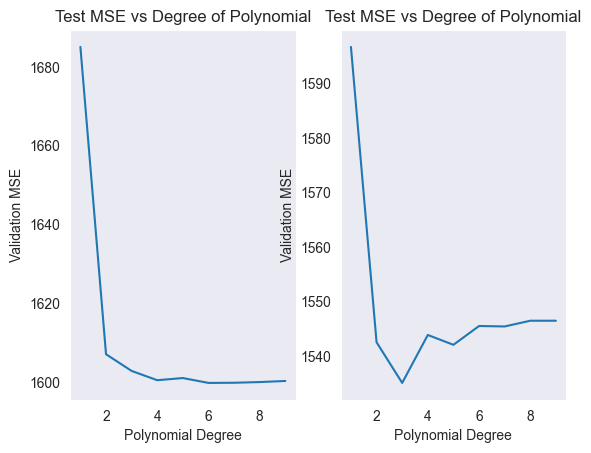

In [41]:
np.random.seed(5)

# Determine optimal degree
def poly_reg(x_train, y_train, x_test, y_test):
    validation_MSE = {}
    test_MSE = {}

    for i in range(1, 10):
        poly = PolynomialFeatures(degree=i)
        x_fit = poly.fit_transform(x_train)

        mse = 0
        loo = LeaveOneOut()

        for train_index, test_index in loo.split(x_fit):
            x, x_cross = x_fit[train_index], x_fit[test_index]
            y, y_cross = y_train[train_index], y_train[test_index]

            # perform linear regression
            model = LinearRegression(fit_intercept=True).fit(x, y)
            pred = model.predict(x_cross)
            mse += mean_squared_error(pred, y_cross)
        validation_MSE [i] = mse/len(x_fit)

        # compute test MSE for model
        model = LinearRegression(fit_intercept=True).fit(x_fit, y_train)
        pred = model.predict(poly.fit_transform(x_test))
        test_MSE[i] = mean_squared_error(pred, y_test)

    # plot validation mean squared error
    lists = sorted(validation_MSE.items())
    x, y = zip(*lists)
    fig = plt.figure()
    ax = fig.add_subplot(121)
    plt.plot(x, y)
    plt.grid()
    ax.set_xlabel('Polynomial Degree')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Test MSE vs Degree of Polynomial')

    lists = sorted(test_MSE.items())
    x, y = zip(*lists)
    ax = fig.add_subplot(122)
    plt.plot(x,y)
    plt.grid()
    ax.set_xlabel('Polynomial Degree')
    ax.set_ylabel('Validation MSE')
    ax.set_title('Test MSE vs Degree of Polynomial')
    plt.show()

x_train, x_test, y_train, y_test = train_test_split(wage_df[['age']], wage_df[['wage']], test_size=0.1)
poly_reg(x_train, y_train.values, x_test, y_test)

Question 4. Apply random forests to predict mdev of the Boston data after converting it to a qualitative response variable - values above the median of mdev is set 1 and others are set to 0. Use all other predictors in prediction of the qualitative data using 25 and 500 trees. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values of number of predictors and trees. Describe the results obtained.

In [42]:
# Read Boston.csv
boston = pd.read_csv('data/Boston.csv', index_col=0)
boston.dropna()

# add qualitative response variable named medv1
medv1 = boston['medv'].apply(lambda i: int(i > boston.medv.median()))
boston['medv1'] = medv1
boston.head(-1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,medv1
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,1
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8,0
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,1
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,1


In [43]:
# separate predictors and response variables
x = boston.drop(['medv'], axis=1)
x = x.drop(['medv1'], axis=1)
y = boston.medv1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# 25 Trees
clf = RandomForestClassifier(random_state=5 ,n_estimators = 25).fit(x_train, y_train)
y_pred = clf.predict(x_test)

# mean squared error
print("25 Trees MSE:", mean_squared_error(y_test, y_pred))

25 Trees MSE: 0.14705882352941177


In [44]:
# can use the same split data from before to see how it compares, now with 500 trees
clf = RandomForestClassifier(random_state=5, n_estimators=500).fit(x_train, y_train)
y_pred = clf.predict(x_test)

# mean squared error
print("500 Trees MSE:", mean_squared_error(y_test, y_pred))

500 Trees MSE: 0.11764705882352941


In [45]:
# we could also use Exhaustive Feature Selector from mlxtend
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/
def best_subset_func(estimator, X, y, max_size=10, cv=5):
    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            predictions = estimator.fit(x_train.iloc[:, list(subset)], y_train).predict(x_test.iloc[:, list(subset)])
            # get the subset with the best score among subsets of the same size
            score = mean_squared_error(y_test, predictions)
            if score < best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    return best_size_subset

clf = RandomForestClassifier(random_state=5, n_estimators=15, bootstrap=True)

best_size_subset = best_subset_func(clf, x, y, max_size=15, cv=5)

[(4, 8, 11), 0.08823529411764706]


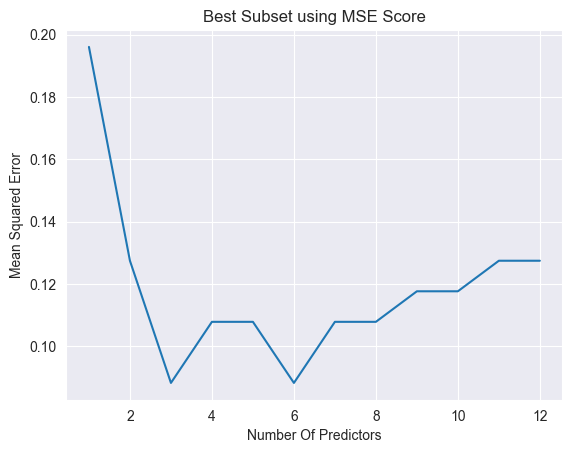

In [46]:
def calc_best_score(estimator, x_train, y_train, best_size_subset, stepwise=False):
    best_score = np.inf

    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        predictions = estimator.fit(x_train.iloc[:, list(subset)], y_train).predict(x_test.iloc[:, list(subset)])
        score = mean_squared_error(y_test, predictions)

        if score < best_score:
            best_score, best_subset = score, subset

        list_scores.append(score)
    return best_subset, best_score, list_scores

clf = RandomForestClassifier(random_state=5, n_estimators=30, bootstrap=True, oob_score=True)

best_subset, best_score, list_scores = calc_best_score(clf, x_train, y_train, best_size_subset)

plt.plot(np.arange(1, x.shape[1]+1), list_scores)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number Of Predictors")
plt.title("Best Subset using MSE Score")

print([best_subset, best_score])

We can see that the best subset has 6 predictors, those being

Question 5. We want to predict Sales in the Carseats data set using regression trees and related approaches.

a) Split the data set into a training set and a test set

In [47]:
import numpy as np
import pandas as pd

data = pd.read_csv("data/Carseats.csv")

shelveDummies = pd.get_dummies(data['ShelveLoc'], prefix="shelve")
urbanDummies = pd.get_dummies(data['Urban'], prefix='urban')
USDummies = pd.get_dummies(data['US'], prefix='US')

X = data.drop(['Sales'], axis=1).join(shelveDummies).join(urbanDummies).join(USDummies).drop(['ShelveLoc', 'Urban', 'US'], axis=1).iloc[:, 1:]

y=data['Sales']


b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [48]:
clf = DecisionTreeRegressor(max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.5, random_state=5)

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Regression Tree MSE:',mean_squared_error(y_test, predictions))


Regression Tree MSE: 5.621764198731552


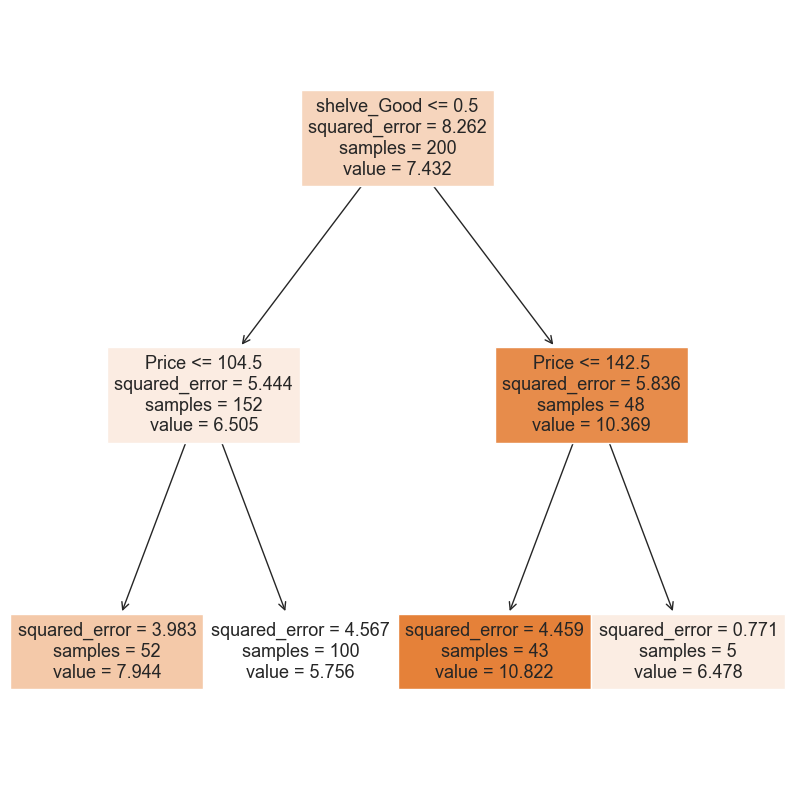

In [49]:
fig = plt.figure(figsize=(10,10))
tree_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   filled=True)


The above diagram is a regression tree with a max depth of 2, displaying deeper trees give trees with more leaves at the cost of complexity. The tree shows that the most important predictor was 'ShelveLoc', then the 'Price' variable.

c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

Best complexity is:  6


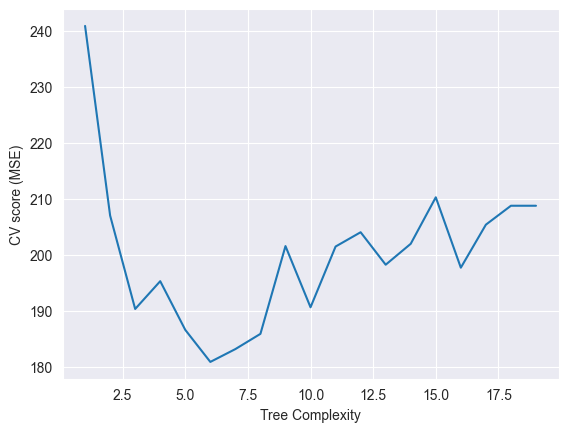

In [50]:
k = 10

kf = KFold(n_splits=k)

scores = []
best_col = 0
best_score = np.inf

maxTreeCol = 20

for a in np.arange(1,maxTreeCol):
  clf = DecisionTreeRegressor(random_state=5, max_depth=a)

  CVsum = 0
  for train_indices, test_indices in kf.split(X, y):
    predictions = clf.fit(X.iloc[train_indices], y[train_indices]).predict(X.iloc[test_indices])
    #we need MSE
    MSE = len(test_indices) * mean_squared_error(y[test_indices], predictions)
    CVsum = CVsum + MSE

  CV = CVsum / k
  scores.append(CV)

  if CV < best_score:
    best_score = CV
    best_degree = a

plt.xlabel("Tree Complexity")
plt.ylabel("CV score (MSE)")

plt.plot(range(1,maxTreeCol), scores)

print("Best complexity is: ", best_degree)

d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Determine which variables are most important (variable importance measure).

Bagging MSE: 2.645558313299999


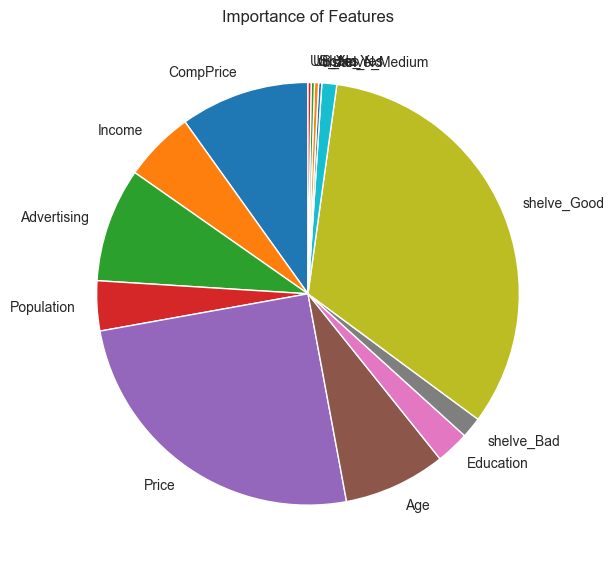

In [51]:
bagger = BaggingRegressor(random_state=5, n_estimators=100)
bagger.fit(X_train, y_train)

y_pred = bagger.predict(X_test)
print('Bagging MSE:', mean_squared_error(y_test, y_pred))

importances = np.mean([tree.feature_importances_ for tree in bagger.estimators_], axis=0)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121)

plt.pie(importances, labels=X_train.columns.tolist(), startangle=90)

plt.tight_layout
plt.title('Importance of Features')
plt.show()

e) Use random forests to analyze this data. What test MSE do you obtain? Determine which variables are most important (variable importance measure). Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [52]:
forest = RandomForestRegressor(random_state=5)
forest.fit(X_train, y_train.values.ravel())
pred = forest.predict(X_test)
print('Test MSE using Random Forests:', mean_squared_error(pred, y_test))

Test MSE using Random Forests: 2.673423961299999


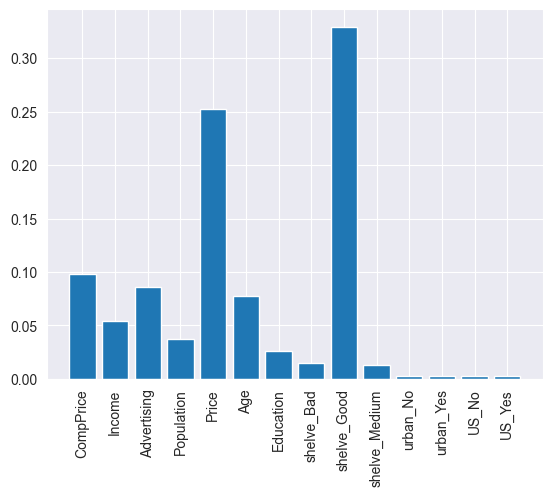

In [53]:
importance = forest.feature_importances_

plt.bar([x for x in X.columns], importance, width=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
num_estimators = X.shape[1]

forest_list_mse = []
forest_best_mse = np.inf
forest_best_num_estimators = 0

for i in range(1, num_estimators):
    forest = RandomForestRegressor(random_state=5, n_estimators=100, max_features=i)
    forest.fit(X_train, y_train)

    predictions = forest.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    forest_list_mse.append(mse)
    if mse < forest_best_mse:
        forest_best_mse = mse
        forest_best_num_estimators = i

Best number of estimators is: 
11


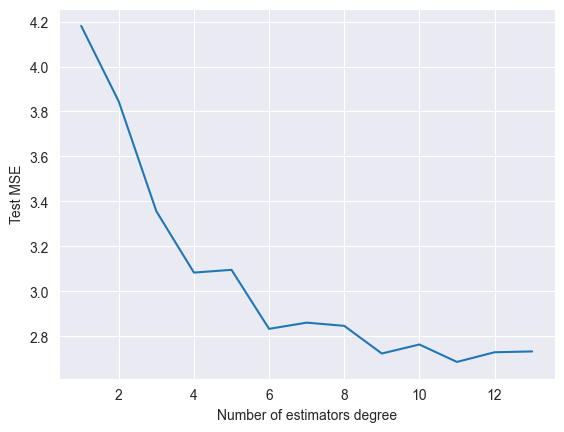

In [55]:
plt.xlabel("Number of estimators degree")
plt.ylabel("Test MSE")

plt.plot(range(1, num_estimators), forest_list_mse)

print("Best number of estimators is: ")
print(forest_best_num_estimators)

Question 6)  We now use boosting to predict Salary in the Hitters data set.

a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [56]:
# Read csv
hitters = pd.read_csv('data/Hitters.csv')
# Drop unknown information
hitters = hitters.dropna()
# Log transform salaries
hitters['Salary'] = hitters['Salary'].apply(np.log)

# Remap everything to an integer value
hitters['League'] = hitters['League'].map({'N': 1, 'A': 0})
hitters['NewLeague'] = hitters['NewLeague'].map({'N': 1, 'A': 0})
hitters['Division'] = hitters['Division'].map({'W': 1, 'E': 0})

hitters.head(-1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,6.163315,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,6.173786,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,6.214608,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,4.516339,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,6.620073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,593,172,22,82,100,57,1,593,172,22,82,100,57,0,1,1222,139,15,5.105945,0
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,6.551080,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,6.774224,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,5.953243,0


b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [57]:
training_set = hitters.iloc[0:200]
test_set = hitters.iloc[200:]

c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter $\lambda$. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.
d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

C:\Users\Brandon\AppData\Local\Temp\ipykernel_3532\3779813916.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


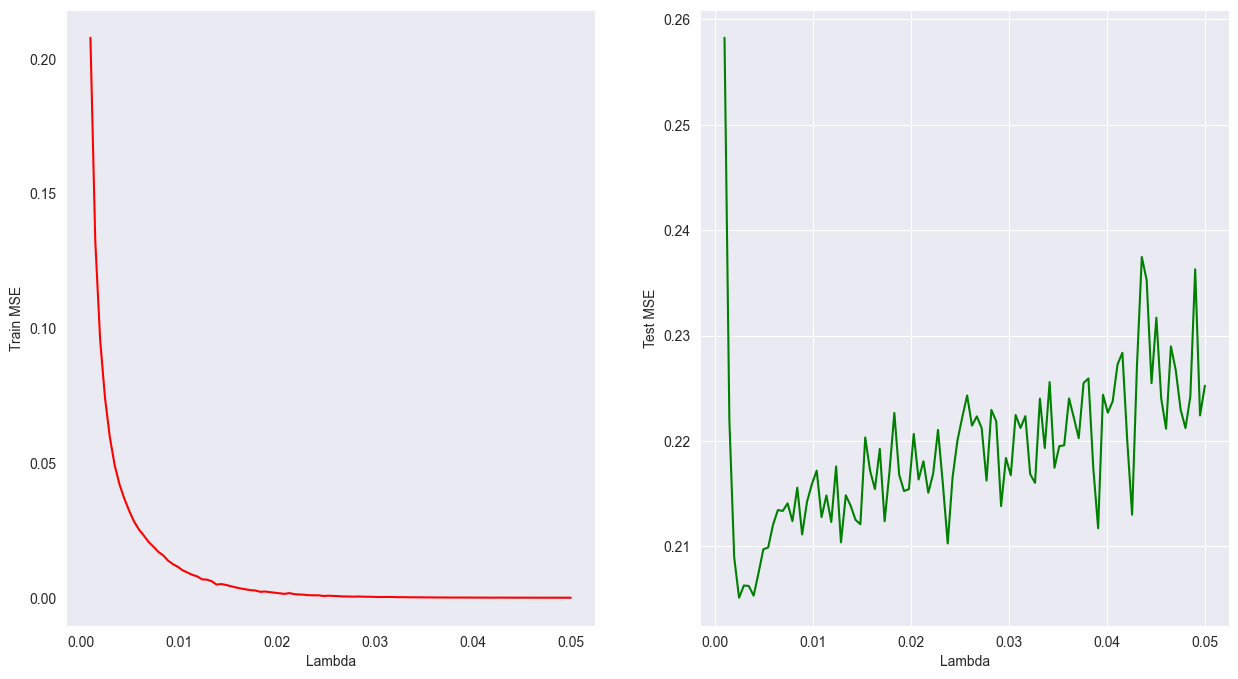

In [58]:
train_MSE = {}
test_MSE = {}

def boosting_shrinkage(X_train, Y_train, X_test, Y_test, shrinkages):

    for s in shrinkages:
        clf = GradientBoostingRegressor(random_state=5, n_estimators=1000, learning_rate=s)
        clf.fit(X_train, Y_train)
        p = clf.predict(X_train)
        train_MSE[s] = mean_squared_error(p, Y_train)
        p = clf.predict(X_test)
        test_MSE[s] = mean_squared_error(p, Y_test)
    return (train_MSE, test_MSE)

x_train = training_set.drop(['Salary'], axis=1)
x_test = test_set.drop(['Salary'], axis=1)
y_train = training_set['Salary']
y_test = test_set['Salary']

results = boosting_shrinkage(x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), np.linspace(0.001, 0.05, 100))

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)
lists = sorted(results[0].items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label='Training Error')

ax.set_xlabel('Lambda')
ax.set_ylabel('Train MSE')
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(results[1].items())
x, y = zip(*lists)
plt.plot(x, y, color='g', label='Test Error')

ax.set_xlabel('Lambda')
ax.set_ylabel('Test MSE')
ax.grid()

plt.grid(b=True)
plt.show()

e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in the chapters 3 and 6.

In [59]:
lm = LinearRegression()

lin_model = lm.fit(x_train, y_train)
lin_preds = lin_model.predict(x_test)
print("Test MSE using linear regression:", mean_squared_error(y_test, lin_preds))

parameters = {'learning_rate': np.linspace(0.001, 0.5, 20), 'n_estimators': np.arange(1, 40, 2)}
clf = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=5), parameters, n_jobs=4, cv=10)
clf.fit(x_train, y_train.values.ravel())
model = clf.best_estimator_
pred = model.predict(x_test)
print("Test MSE from boosting (using lambda = 0.01):", mean_squared_error(pred, y_test))

Test MSE using linear regression: 0.49179593754549417
Test MSE from boosting (using lambda = 0.01): 0.2114150656640916


Boosting has the smaller test MSE

f) Which variables appear to be the most important predictors in the boosted model?

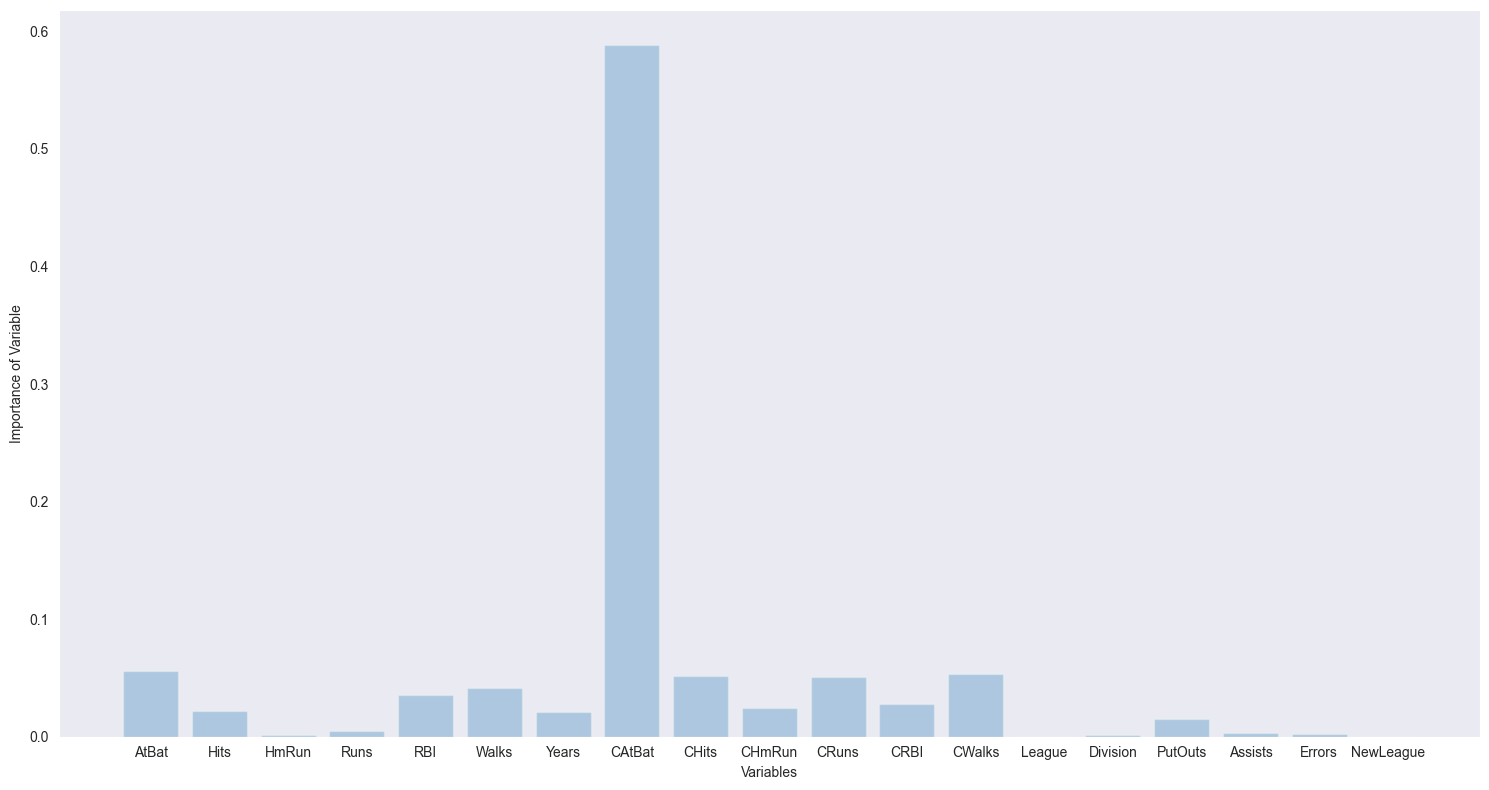

In [60]:
importances = model.feature_importances_

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.bar(x_train.columns.tolist(), importances, alpha=0.3)
ax.set_xlabel('Variables')
ax.set_ylabel('Importance of Variable')
plt.grid()
plt.tight_layout()
plt.show()

g) Now apply bagging to the training set. What is the test MSE for this approach?

In [61]:
bagging = BaggingRegressor(random_state=5)
bagging.fit(x_train, y_train.values.ravel())
bagging_pred = bagging.predict(x_test)
print("Test MSE with bagging:", mean_squared_error(bagging_pred, y_test))

Test MSE with bagging: 0.26776157258668715
